# Data Scientist Take-home Challenge


This document contains list of the tasks we would like you to complete in order to evaluate fully your technical abilities. However, if by some reason you cannot get all results in full, don’t worry. The purpose of this exercise is not to get exact numbers, but to understand how you would approach similar assignments, what would be your way of thinking and how you would advise your Client at the end.


You are to work in three separate tasks. Each requires some data handling, modelling and visualizations. We would like to get following outputs from your side:

- All the pseudo-code / code from your software of preference. Please don’t forget to include notes and comments within.
- Numerical outputs of the final models and statistical calculations (if applicable for the specific task)
- Any visualizations of the data you consider useful to support your work (interactive charts would be considered as an advantage)


## Task 1 - Basic Data Handling and Presentation

You are provided with a small subset of data in `data_task1.csv` on in-store purchases by a leading chain of supermarkets. You are required to provide your input on the following questions:

- First, please identify and visualize which store has the highest turnover within the available time period.

- Second, please identify and present in sensible and convenient manner which combination of 3 items is the most frequently appearing in a single transaction (a transaction is indicated by bon_id_int).

- Third, please compute whether buying item with d_global_item_id = 115677 makes it more probable to also buy item 84872, please write your arguments, as well.

## Solution for Task 1

#### Data exploration

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "Data/"

In [522]:
df = pd.read_csv(path+'data_task1.csv')

Let's explore data and understand the meaning of significant variables.

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   d_date_id                     100000 non-null  int64  
 1   d_time_id                     100000 non-null  int64  
 2   d_store_id                    100000 non-null  int64  
 3   d_loyalty_instrument_id       100000 non-null  int64  
 4   d_item_id                     100000 non-null  int64  
 5   d_global_item_id              100000 non-null  int64  
 6   d_person_id                   100000 non-null  int64  
 7   d_promotion_id                100000 non-null  int64  
 8   d_currency_id                 100000 non-null  int64  
 9   d_item_group_id               100000 non-null  int64  
 10  bon_id                        100000 non-null  object 
 11  bon_id_int                    100000 non-null  int64  
 12  hascard                       100000 non-null

The entry (row) in the table seems to be one particulat item in purchase, but sales_amount should can be overall sum per purchase, let's check it, in other words check if we have several bon_id in the table. 

In [548]:
grouped_counts = df.groupby('bon_id_int').size() 
len(grouped_counts[grouped_counts >2])

10057

Ok we have more than 10K purchases with 3 and more items. Let's check some manually. 

In [43]:
# To see all columns
pd.set_option('display.max_columns', None)
#check precisely one item 
df[df.bon_id_int == 417981]

,d_date_id,d_time_id,d_store_id,d_loyalty_instrument_id,d_item_id,d_global_item_id,d_person_id,d_promotion_id,d_currency_id,d_item_group_id,bon_id,bon_id_int,hascard,hasch,unit_price,quantity,sales_amount,sales_amount_before_discount,vat_amount,discount_amount,items_count,card_items_count,card_quantity,card_sales_amount,card_discount_amount,promotion_items_count,promotion_quantity,promotion_sales_amount,promotion_discount_amount,price_w
721,20140901,21,3,1,1,3785,1,1,3,0,M012014090101000075000150,417981,0,0,2.272727,1.0,2.272727,2.272727,0.378788,0.0,1,0,0.0,0.0,0.0,0,0,0,0,2.272727
723,20140901,21,3,1,1,6630,1,1,3,0,M012014090101000075000150,417981,0,0,3.323232,1.0,3.323232,3.323232,0.553535,0.0,1,0,0.0,0.0,0.0,0,0,0,0,3.323232
725,20140901,21,3,1,1,8040,1,1,3,0,M012014090101000075000150,417981,0,0,1.666667,1.0,1.666667,1.666667,0.277778,0.0,1,0,0.0,0.0,0.0,0,0,0,0,1.666667
727,20140901,21,3,1,1,32005,1,1,3,0,M012014090101000075000150,417981,0,0,7.666667,1.0,7.666667,7.666667,1.277778,0.0,1,0,0.0,0.0,0.0,0,0,0,0,7.666667
728,20140901,21,3,1,1,49001,1,1,3,0,M012014090101000075000150,417981,0,0,1.868687,1.0,1.868687,1.868687,0.311111,0.0,1,0,0.0,0.0,0.0,0,0,0,0,1.868687
730,20140901,21,3,1,1,59945,1,1,3,0,M012014090101000075000150,417981,0,0,1.262626,1.0,1.262626,1.262626,0.210101,0.0,1,0,0.0,0.0,0.0,0,0,0,0,1.262626


In [550]:
# purchases with quantity > 2
df[df.quantity > 2].head()

,d_date_id,d_time_id,d_store_id,d_loyalty_instrument_id,d_item_id,d_global_item_id,d_person_id,d_promotion_id,d_currency_id,d_item_group_id,bon_id,bon_id_int,hascard,hasch,unit_price,quantity,sales_amount,sales_amount_before_discount,vat_amount,discount_amount,items_count,card_items_count,card_quantity,card_sales_amount,card_discount_amount,promotion_items_count,promotion_quantity,promotion_sales_amount,promotion_discount_amount,price_w
2,20140901,15,9,1,1,1113,1,1,3,0,M112014090101000005000109,769791,0,0,0.454545,6.0,2.727273,2.727273,0.454545,0.0,1,0,0.0,0.0,0.0,0,0,0,0,2.727270
51,20140901,16,9,1,1,13193,1,1,3,0,M112014090101000025000109,774484,0,0,2.020202,3.0,6.060606,6.060606,0.000000,0.0,1,0,0.0,0.0,0.0,0,0,0,0,6.060606
56,20140901,16,10,1,1,126943,1,1,3,0,M122014090101000001000092,783758,0,0,1.111111,2.5,2.728283,2.728283,0.454545,0.0,1,0,0.0,0.0,0.0,0,0,0,0,2.777778
62,20140901,16,11,1,1,7271,1,1,3,0,M142014090101000013000030,818042,0,0,0.353535,4.0,1.414141,1.414141,0.235354,0.0,1,0,0.0,0.0,0.0,0,0,0,0,1.414140
110,20140901,17,9,1,1,1113,1,1,3,0,M112014090101000034000109,774486,0,0,0.454545,4.0,1.818182,1.818182,0.303030,0.0,1,0,0.0,0.0,0.0,0,0,0,0,1.818180


In [557]:
df.quantity.dtype

dtype('float64')

Ok, seems we have different sales_amount for the same bon_id, that means we don't need to remove duplicates to calculate turnover. Also there is no difference in sales amount and price_w so there is no need to take into account quantity or items_count. It seems we have somehow simplified dataset, ok. 

In [ ]:
# Reset display options to default back
pd.reset_option('display.max_columns')

In [19]:
#check if we have different currencies 
len(df.d_promotion_id.unique())

1

We also have only one currency. Is it CHF? 

#### 1.1. Identify and visualize which store has the highest turnover within the available time period.

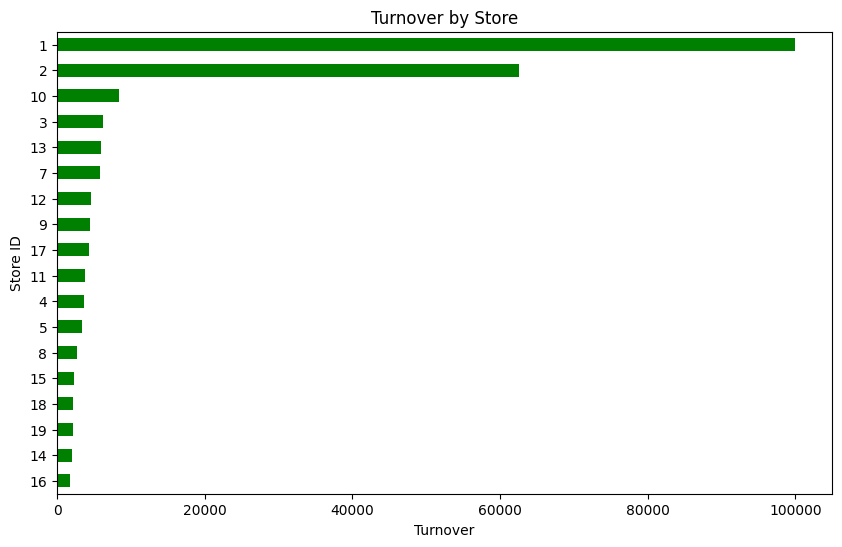

The answer to 1.1: The store with the highest turnover is Store ID 1 with the total amount of 99958 of some bucks


In [222]:
store_turnover = df.groupby('d_store_id')['sales_amount'].sum()

# Find the store with the highest turnover
highest_turnover_store = store_turnover.idxmax()
# total amount there
highest_amount = int(store_turnover[highest_turnover_store])

# Visualize the turnover for each store
plt.figure(figsize=(10, 6))
store_turnover.sort_values().plot(kind='barh', color='green')
plt.title('Turnover by Store')
plt.xlabel('Turnover')
plt.ylabel('Store ID')
plt.show()

print(f"The answer to 1.1: The store with the highest turnover is Store ID {highest_turnover_store} with the total amount of {highest_amount} of some bucks")

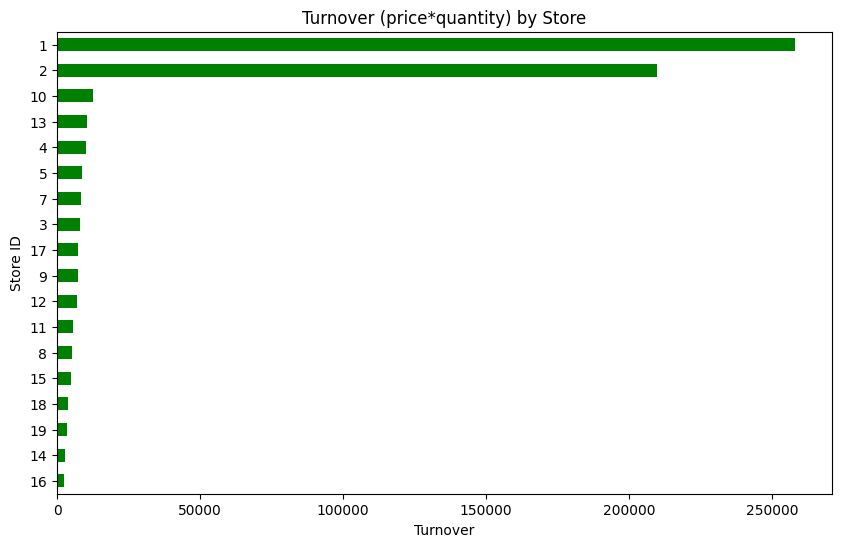

The answer to 1.1: The store with the highest turnover (as price*quantity) is Store ID 1 with the total amount of 258017.0 of some bucks


In [583]:
# what it amount is price*quality nevertheless? 

store_turnover = df.groupby('d_store_id').apply(lambda x: (x['price_w'] * x['quantity']).sum())
store_turnover

# Find the store with the highest turnover
highest_turnover_store = store_turnover.idxmax()
highest_turnover_store

# total amount there
highest_amount = store_turnover[highest_turnover_store]

# Visualize the turnover for each store
plt.figure(figsize=(10, 6))
store_turnover.sort_values().plot(kind='barh', color='green')
plt.title('Turnover (price*quantity) by Store')
plt.xlabel('Turnover')
plt.ylabel('Store ID')
plt.show()

print(f"The answer to 1.1: The store with the highest turnover (as price*quantity) is Store ID {highest_turnover_store} with the total amount of {highest_amount.round()} of some bucks")

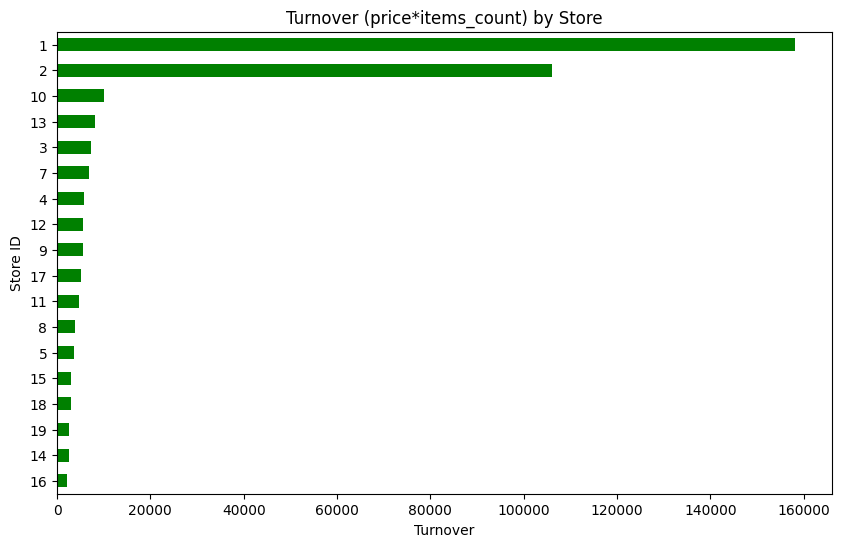

The answer to 1.1: The store with the highest turnover (as price*items_count) is Store ID 1 with the total amount of 158147.661464 of some bucks


In [584]:
# what it amount is price*quality nevertheless? 

store_turnover = df.groupby('d_store_id').apply(lambda x: (x['price_w'] * x['items_count']).sum())
store_turnover

# Find the store with the highest turnover
highest_turnover_store = store_turnover.idxmax()
highest_turnover_store

# total amount there
highest_amount = store_turnover[highest_turnover_store]

# Visualize the turnover for each store
plt.figure(figsize=(10, 6))
store_turnover.sort_values().plot(kind='barh', color='green')
plt.title('Turnover (price*items_count) by Store')
plt.xlabel('Turnover')
plt.ylabel('Store ID')
plt.show()

print(f"The answer to 1.1: The store with the highest turnover (as price*items_count) is Store ID {highest_turnover_store} with the total amount of {highest_amount} of some bucks")

#### 1.2. Identify and present in sensible and convenient manner which combination of 3 items is the most frequently appearing in a single transaction (a transaction is indicated by bon_id_int).

In [82]:
# let's look on the count of items per purchase
items_count = df.groupby('bon_id_int')['d_global_item_id'].count()
items_count_sorted = items_count.sort_values(ascending = False)
items_count_sorted

bon_id_int
511660    93
638753    83
638158    79
637588    77
511121    76
          ..
667224     1
667225     1
667226     1
667227     1
835447     1
Name: d_global_item_id, Length: 24426, dtype: int64

In [83]:
len(items_count > 2)

24426

So we have about 24K purchases with more than 3 items, and some of them has much more than 3 items, and therefore different combinations. Let's calculate each combination count: 

In [137]:
# bon_ids with 3 or more purchases
list_3items = items_count[items_count > 2].index.tolist()

In [510]:
# function which returns dictionary with all the possible combinations of 3 items from list
def all_combinations3(list):
    # list = str(list) # to convert int ids into str to get correct addition
    list = sorted(list) # to keep keys in dictionary sorted
    dict = {}
    items = len(list)
    for i in range(items-2):
        for j in range(i+1, items-1):
            for k in range(j|+1, items):
                comb = str(list[i])+', '+str(list[j])+', '+str(list[k]) # to convert int ids into str to as unique keys per each 3 items
                if comb in dict:dict[comb] +=1
                else: dict[comb] = 1
    return dict
#todo rewrite with recursion and maybe default dic(?)

# function to add to first dictionary values from second one
def add_to_dict(dict1, dict2):
    for key in dict2.keys(): 
        if key in dict1: dict1[key] += 1
        else: dict1[key] = 1

In [501]:
import time 

In [511]:
# gathering all combinations

start = time.time()
all_combinations = {}
for bon in list_3items: 
    list = df[df.bon_id_int==bon].d_global_item_id.tolist()
    combinations_for_bon = all_combinations3(list)
    add_to_dict(all_combinations, combinations_for_bon)

end = time.time()
delay = end-start

print(f'It took {delay} seconds')

It took 5.22835898399353 seconds


Can we do better and quicker? 

In [ ]:
from itertools import combinations
from collections import Counter

def all_combinations3(items):
    # Use itertools.combinations to generate all combinations of 3 items and count them
    return Counter([', '.join(map(str, comb)) for comb in combinations(sorted(items), 3)])

def add_to_dict(dict1, dict2):
    # Efficiently add or update values from dict2 to dict1
    for key, value in dict2.items():
        dict1[key] += value

start = time.time()

#Initialize an empty Counter for all combinations
all_combinations = Counter()

for bon in list_3items: 
    # Extract list of items for the current bon
    items_list = df[df.bon_id_int == bon].d_global_item_id.tolist()
    # Generate combinations for the current list of items
    combinations_for_bon = all_combinations3(items_list)
    # Add these combinations to the overall Counter
    all_combinations.update(combinations_for_bon)

end = time.time()
delay = end-start

print(f'It took {delay}')

In [171]:
df_3items = pd.DataFrame.from_dict(all_combinations.items()) #dict to dataframe

In [178]:

df_3items_sorted = df_3items.sort_values(by=1, ascending=False) 
df_3items_sorted.rename(columns = {0:'Combinations', 1:'Count'}, inplace = True)
df_3items_sorted.head(10)

,Combinations,Count
418539,"5576, 6625, 33292",69
100867,"5576, 6625, 12666",66
89978,"5576, 6625, 12712",58
365087,"5576, 6625, 14758",55
202216,"125479, 126619, 131513",51
14172,"125479, 125607, 125924",51
112533,"125479, 125607, 126619",46
163019,"125479, 125962, 131513",45
319926,"6625, 12666, 12712",44
171558,"125479, 125939, 131513",43


**Answer to 1.2: Our winner is combination "5576, 6625, 33292", let's plot top10 of the winners combinations:** 

<Axes: ylabel='Combinations'>

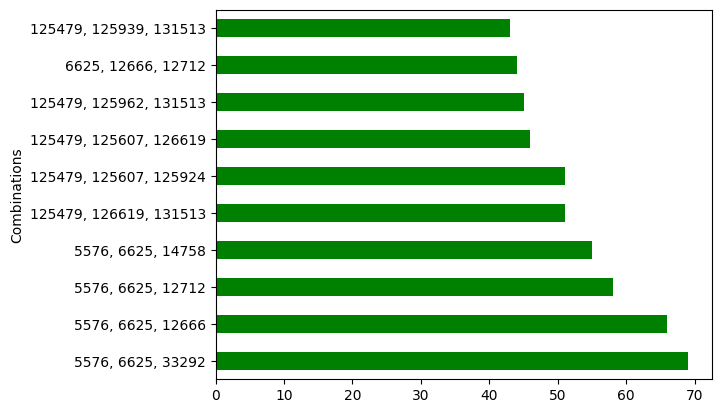

In [225]:
df_3items_sorted10.plot(x='Combinations', y='Count', kind='barh', legend=False, color='green') #todo make it interactive with plotly

#### 1.3 Compute whether buying item with d_global_item_id = 115677 makes it more probable to also buy item 84872, please write your arguments, as well.

Overall transactions: 

In [195]:
all_transactions = len(df.bon_id.unique())
all_transactions

24426

Item 115677 was bought: 

In [197]:
bought115677 = len(df[df.d_global_item_id == 115677])
bought115677

37

Item 84872 was bought: 

In [198]:
bought84872 = len(df[df.d_global_item_id == 84872])
bought84872

46

Both items were bought together:

In [546]:
bon_ids_115677 = df[df.d_global_item_id == 115677]['bon_id_int'].tolist() #list with bon_ids where 115677 was bought
len(df[(df.bon_id_int.isin(bon_ids_115677)) & (df.d_global_item_id == 84872)])


30

~~So if there were not mistake those two items were never bought together within given dataset. They were both separately bought with similar probability 27/24426 and 46/24426 respectively, but since those were never bought within one purchase, I would say that **buying item with d_global_item_id = 115677 *does not make it more probable* to also buy item 84872, and given the following condition the buying 115677 even decreases chances for buying 84872**. But I plan to check it again :) That does not seem to be that easy.~~

Okay! Now we have seemingly correct solution :) 
First item was bought 37 times, second — 46 times. And they both were bought 30 times. Given we have about 24K (unique) purchases it is kind of obvious that by buying first one we increases chance to by second. But to explain it formally lets roughly calculate probability of buying item 84872 overall, it is 46/24K. But the probability of buying item 84872 within purchases included item 115677 is 30/37 (30 purchases out of 37 includes second item). So the second probability is two orders of magnitude higher than first. It is quite convincing, isn't it? We can reach the same conclusion with the Bayes' theorem but that is not even necessary. 

# Task 2

You are provided with extracts from two datasets in `data_task2_extract_1.csv` and `data_task2_extract_2.csv`, containing company information. 

The first dataset has standardized publically available information obtained via web scrapping, the second dataset contains confidential internal company information. 

In full, the datasets contain tens of thousands of observations so manual processing is not feasible. The task at hand is to match the data items between the two datasets as best as possible. The primary matching criteria is Address (identified by fields **Address Name**, **City** and **PostCode**). However, address fields are often inputted by humans, thus conventions vary widely. 

Please prepare an automated approach for canonicalization. Your code should handle discrepancies such as representing *Strasse* in full or shortened (*Str.*). The algorithm need not handle for all possible discrepancies, as this is hard to implement without the full data, description of an iterative procedure is sufficient.

**Bonus** - One company might appear with different addresses. Imagine the company building / offices are at an intersection and the company records contain registration on each of the two intersecting streets, i.e. addresses are different. Please formulate an approach to handle for such cases. Sample implementation will yield more points.

In [416]:
extract1 = pd.read_csv(path+'data_task2_extract_1.csv')
extract2 = pd.read_csv(path+'data_task2_extract_2.csv')

In [417]:
print('Extract 1: \n', 'entries: ',len(extract1),'\n', extract1.head(10), '\n')
print('Extract 2: \n','entries: ',len(extract2),'\n',  extract2.head(10))

Extract 1: 
 entries:  5412 
                      Company.Name                 Address             City  \
0                    Carsten Helm             Ulmenstr. 8           Wismar   
1  Zirpel & Pautzsch Ingenieur Pa        Paditzer Str. 33        Altenburg   
2                 Eberhard Zessin       Steingartenweg 12       Heidelberg   
3                    Gerold Fuchs              Mühlweg 12        Dietingen   
4                 Rudi Biedritzky      Zaisentalstr. 70/1       Reutlingen   
5                  Wolfgang Jäger           Wiesenstr. 11           Rodgau   
6                   Mario Tsiknas              Am Delf 31  Bad Zwischenahn   
7  Matthias Essers GmbH Elektrote   Leopold-Hoesch-Str. 4    Geilenkirchen   
8                   Andre Hanisch       Im Kressgraben 18   Untereisesheim   
9                     Paul Strigl  Thomas-Schwarz-Str. 26           Dachau   

  Postcode  
0    23966  
1     4600  
2    69118  
3    78661  
4    72760  
5    63110  
6    26160  
7    52

As we can see there are 5412 entries in Extract 1, scraped one and 222 entries in handmade Extract 2. 

The general approach would be to create additional column with canonical spelling. Then process all the current addresses and other fields according to set of rules. For example: 
1. Make all the letters lowercase, remove special characters with spaces, remove double spaces, remove NaN
2. change straße and other different spelling of this word to canonical str written after the name of the street, it seems to be [correct](https://allaboutberlin.com/guides/addressing-a-letter-in-germany) by the way. Do the same for weg, platz, etc.
3. Separate number from name of the street.

I would implement it by creation of separate functions: 

— **clean_address_column** — to create canonical colimn and perform step 1

— **canonize_address_column** — to handle "the strasse" issues and perform step 3.


The advantage of this approach is the possibility to make changes quickly. So after implementation I would check manually output and make changes to following functions. 
Exact implementation is below. 

In [366]:
import re

In [367]:
print(extract1.Address.apply(type).value_counts()) #btw we have problems with types in extract1

Address
<class 'str'>      5328
<class 'float'>      84
Name: count, dtype: int64


In [368]:
# Filter the DataFrame to show only rows where 'Address' is of type float
float_rows = extract1[extract1['Address'].apply(lambda x: isinstance(x, float))]

# Display the rows with float values in the 'Address' column
print(float_rows)

     Company.Name Address City Postcode
46          68723     NaN  NaN      NaN
121         34637     NaN  NaN      NaN
154         53225     NaN  NaN      NaN
282         39108     NaN  NaN      NaN
301         48231     NaN  NaN      NaN
...           ...     ...  ...      ...
5235        99427     NaN  NaN      NaN
5307        77694     NaN  NaN      NaN
5319        18190     NaN  NaN      NaN
5352        90491     NaN  NaN      NaN
5410        25709     NaN  NaN      NaN

[84 rows x 4 columns]


So we need to adjust type as well and take care of NaN

In [420]:
def clean_address_column(df, column_name):
    # Define a function to replace special characters while preserving German letters and slashes
    def clean_string(s):
        if pd.isnull(s):
            return ''  # Return empty string for NaN values
        # Replace special characters with space except for German letters and slash
        s = re.sub(r'[^a-z0-9äöüß/\s]', ' ', s.lower())
        # Replace multiple spaces with single space
        s = re.sub(r'\s+', ' ', s)
        return s.strip()

    # Apply the function to the specified column and create a new 'address_can' column
    df[column_name + '_clean'] = df[column_name].apply(clean_string)
    
    # remove rows where the cleaned address is an empty string
    df = df[df[column_name + '_clean'] != '']

    return df

extract1 = clean_address_column(extract1, 'Address')

# Display the result
print(extract1[['Address', 'Address_clean']].head(50))
print(len(extract1['Address_clean'].unique()))


                          Address                 Address_clean
0                     Ulmenstr. 8                    ulmenstr 8
1                Paditzer Str. 33               paditzer str 33
2               Steingartenweg 12             steingartenweg 12
3                      Mühlweg 12                    mühlweg 12
4              Zaisentalstr. 70/1             zaisentalstr 70/1
5                   Wiesenstr. 11                  wiesenstr 11
6                      Am Delf 31                    am delf 31
7           Leopold-Hoesch-Str. 4          leopold hoesch str 4
8               Im Kressgraben 18             im kressgraben 18
9          Thomas-Schwarz-Str. 26         thomas schwarz str 26
10                  Schauerweg 27                 schauerweg 27
11                Osterbergstr. 6                osterbergstr 6
12           Richtenberger Str. 4           richtenberger str 4
13       Heinrich-Hoffmann-Str. 5       heinrich hoffmann str 5
14         Hermann-Gmeiner-Str. 7       

In [358]:
# .str.replace('€ ', '').str.replace('.', '').replace(',', '.')

# # Remove empty spaces between values in the 'storage' column
# df1['storage'] = df1['storage'].str.replace(r'\s+', '', regex=True)

# # Remove text after number in 'ratings_number' column
# df1['ratings_number'] = df1['ratings_number'].str.replace(r'\D+$', '', regex=True)

# # Removing wrongly extracted values 
# df1['model_number'] = df1['model_number'].replace(['SSD', 'TB', 'GB'], np.nan, regex=True)

# df1

In [419]:
# import pandas as pd
# import re

# def canonize_address(df, column_name):
#     def canonize(s):
#         # Correct the spaces between the name and 'str', 'weg', or 'platz'
#         s = re.sub(r'\b(str)\s', 'str', s)
#         s = re.sub(r'\b(weg)\s', 'weg', s)
#         s = re.sub(r'\b(platz)\s', 'platz', s)

#         # Ensure 'strasse' and its variations are also corrected
#         s = re.sub(r'\b(strasse|straße)\s?', 'str', s)

#         # No changes to slashes within numbers
#         return s.strip()

#     # Apply the function to the specified column
#     df[column_name + '_can'] = df[column_name].apply(canonize)

#     return df

# # Assuming 'extract1' is your DataFrame and 'Address_clean' is the column with original addresses
# extract1 = canonize_address(extract1, 'Address_clean')

# # Display the result
# print(extract1[['Address_clean', 'Address_clean_can']].head(50))

                   Address_clean            Address_clean_can
0                     ulmenstr 8                   ulmenstr 8
1                paditzer str 33               paditzer str33
2              steingartenweg 12            steingartenweg 12
3                     mühlweg 12                   mühlweg 12
4              zaisentalstr 70/1            zaisentalstr 70/1
5                   wiesenstr 11                 wiesenstr 11
6                     am delf 31                   am delf 31
7           leopold hoesch str 4          leopold hoesch str4
8              im kressgraben 18            im kressgraben 18
9          thomas schwarz str 26         thomas schwarz str26
10                 schauerweg 27                schauerweg 27
11                osterbergstr 6               osterbergstr 6
12           richtenberger str 4           richtenberger str4
13       heinrich hoffmann str 5       heinrich hoffmann str5
14         hermann gmeiner str 7         hermann gmeiner str7
15      

In [421]:
def canonize_address_column(df, column_name):
    def canonize(s):
        # Step 1: Substitute 'strasse', 'straße', 'str.' with 'str'
        s = re.sub(r'\b(strasse|straße|str\.| str)\b', 'str', s)

        # # Step 1.1: Substitute 'strasse', 'straße', 'str.' with 'str'
        # s = re.sub(r'\b(strasse|straße|str\.| str)\b', 'str', s)
        
        # Step 2: Substitute 'name weg' with 'nameweg'
        s = re.sub(r'\ wegb', 'weg', s)

        # Step 3: Substitute 'platz' with 'nameplatz'
        s = re.sub(r'\ platz\b', 'platz', s)

        # Replace German umlauts and ß with corresponding Latin characters
        s = s.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue').replace('ß', 'ss')

        # The above steps already preserve slashes because they're looking for whole words only.
        return s.strip()

    # Apply the function to the specified column and create a new 'address_can' column
    df[column_name + '_can'] = df[column_name].apply(canonize)

    return df

# Assuming 'extract1' is your DataFrame and 'Address_can' is the column with original addresses
extract1 = canonize_address_column(extract1, 'Address_clean')

# Display the result
print(extract1[['Address_clean', 'Address_clean_can']].head(50))

                   Address_clean              Address_clean_can
0                     ulmenstr 8                     ulmenstr 8
1                paditzer str 33                 paditzerstr 33
2              steingartenweg 12              steingartenweg 12
3                     mühlweg 12                    muehlweg 12
4              zaisentalstr 70/1              zaisentalstr 70/1
5                   wiesenstr 11                   wiesenstr 11
6                     am delf 31                     am delf 31
7           leopold hoesch str 4            leopold hoeschstr 4
8              im kressgraben 18              im kressgraben 18
9          thomas schwarz str 26           thomas schwarzstr 26
10                 schauerweg 27                  schauerweg 27
11                osterbergstr 6                 osterbergstr 6
12           richtenberger str 4             richtenbergerstr 4
13       heinrich hoffmann str 5         heinrich hoffmannstr 5
14         hermann gmeiner str 7        

In [422]:
extract2 = canonize_address_column(clean_address_column(extract2, 'Address'), 'Address_clean')
extract2.head(50)

/var/folders/3t/1cf4qhj170q46d820lvp7bzc0000gn/T/ipykernel_56189/2997125715.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_can'] = df[column_name].apply(canonize)


,Address,Postal.Code,Location,Address_clean,Address_clean_can
0,Alfons-Müller-Platz,50389,Wesseling,alfons müller platz,alfons muellerplatz
1,Hauptstr. 10B,66459,Kirkel,hauptstr 10b,hauptstr 10b
2,Edisonstr. 36,04435,Schkeuditz,edisonstr 36,edisonstr 36
3,Kutterstr. 3 / 26386 Wilhelmshaven-Rüstersiel,26386,Wilhelmshaven,kutterstr 3 / 26386 wilhelmshaven rüstersiel,kutterstr 3 / 26386 wilhelmshaven ruestersiel
4,Am neuen Markt 8,66877,Ramstein-Miesenbach,am neuen markt 8,am neuen markt 8
5,Rübenkamp 226,22307,Hamburg,rübenkamp 226,ruebenkamp 226
6,Geisenheimer Str. 10,65197,Wiesbaden,geisenheimer str 10,geisenheimerstr 10
7,Rathausplatz 1,30823,Garbsen,rathausplatz 1,rathausplatz 1
8,Weilimdorfer Str. 74 2,70839,Gerlingen,weilimdorfer str 74 2,weilimdorferstr 74 2
9,Werkstr. 1,24837,Schleswig,werkstr 1,werkstr 1


In [423]:
extract1.head()

,Company.Name,Address,City,Postcode,Address_clean,Address_clean_can
0,Carsten Helm,Ulmenstr. 8,Wismar,23966,ulmenstr 8,ulmenstr 8
1,Zirpel & Pautzsch Ingenieur Pa,Paditzer Str. 33,Altenburg,4600,paditzer str 33,paditzerstr 33
2,Eberhard Zessin,Steingartenweg 12,Heidelberg,69118,steingartenweg 12,steingartenweg 12
3,Gerold Fuchs,Mühlweg 12,Dietingen,78661,mühlweg 12,muehlweg 12
4,Rudi Biedritzky,Zaisentalstr. 70/1,Reutlingen,72760,zaisentalstr 70/1,zaisentalstr 70/1


In [424]:
extract2.head()

,Address,Postal.Code,Location,Address_clean,Address_clean_can
0,Alfons-Müller-Platz,50389,Wesseling,alfons müller platz,alfons muellerplatz
1,Hauptstr. 10B,66459,Kirkel,hauptstr 10b,hauptstr 10b
2,Edisonstr. 36,04435,Schkeuditz,edisonstr 36,edisonstr 36
3,Kutterstr. 3 / 26386 Wilhelmshaven-Rüstersiel,26386,Wilhelmshaven,kutterstr 3 / 26386 wilhelmshaven rüstersiel,kutterstr 3 / 26386 wilhelmshaven ruestersiel
4,Am neuen Markt 8,66877,Ramstein-Miesenbach,am neuen markt 8,am neuen markt 8


Well, for this one it would be better to apply additional cleaning rules or even change something manually since there are no so many entries. But let's check performance before and after the cleaning. 

## Joining

As I understood task the goal is to match scraped data with manually written, in order to find out the name of the company, below is considered this scanario. For another ones the code should be adjusted. 

In [533]:
import pandas as pd

# Left join on 'Address'
left_joined_df = extract2.merge(extract1, on='Address', how='left')

# Left join on 'Address_clean_can'
left_joined_clean_df = extract2.merge(extract1, on='Address_clean_can', how='left')

# Count the number companies added in both cases
num_companies_added_address = left_joined_df['Company.Name'].notnull().sum()
num_companies_added_clean_address = left_joined_clean_df['Company.Name'].notnull().sum()

print(f"Number of unique companies added using 'Address': {num_companies_added_address}")
print(f"Number of unique companies added using 'Address_clean_can': {num_companies_added_clean_address}")


Number of unique companies added using 'Address': 18
Number of unique companies added using 'Address_clean_can': 18


In [534]:
extract1.head(50)

,Company.Name,Address,City,Postcode,Address_clean,Address_clean_can
0,Carsten Helm,Ulmenstr. 8,Wismar,23966,ulmenstr 8,ulmenstr 8
1,Zirpel & Pautzsch Ingenieur Pa,Paditzer Str. 33,Altenburg,4600,paditzer str 33,paditzerstr 33
2,Eberhard Zessin,Steingartenweg 12,Heidelberg,69118,steingartenweg 12,steingartenweg 12
3,Gerold Fuchs,Mühlweg 12,Dietingen,78661,mühlweg 12,muehlweg 12
4,Rudi Biedritzky,Zaisentalstr. 70/1,Reutlingen,72760,zaisentalstr 70/1,zaisentalstr 70/1
5,Wolfgang Jäger,Wiesenstr. 11,Rodgau,63110,wiesenstr 11,wiesenstr 11
6,Mario Tsiknas,Am Delf 31,Bad Zwischenahn,26160,am delf 31,am delf 31
7,Matthias Essers GmbH Elektrote,Leopold-Hoesch-Str. 4,Geilenkirchen,52511,leopold hoesch str 4,leopold hoeschstr 4
8,Andre Hanisch,Im Kressgraben 18,Untereisesheim,74257,im kressgraben 18,im kressgraben 18
9,Paul Strigl,Thomas-Schwarz-Str. 26,Dachau,85221,thomas schwarz str 26,thomas schwarzstr 26


In [535]:
num_companies_added_clean_address

18

In [536]:
left_joined_df.sort_values('Company.Name').head(30)

,Address,Postal.Code,Location,Address_clean_x,Address_clean_can_x,Company.Name,City,Postcode,Address_clean_y,Address_clean_can_y
140,Marktplatz 16,71032,Böblingen,marktplatz 16,marktplatz 16,Ackermann-Service GmbH,Massing,84323,marktplatz 16,marktplatz 16
72,Industriestr. 6,83607,Holzkirchen,industriestr 6,industriestr 6,Bematec Gebäudetechnik e.K.,Bubesheim,89347,industriestr 6,industriestr 6
17,Nordstr. 1,09648,Altmittweida,nordstr 1,nordstr 1,Bernd Delsmann,Altenberge,48341,nordstr 1,nordstr 1
191,Hauptstr. 2,31020,Salzhemmendorf,hauptstr 2,hauptstr 2,Cortina planen + beraten UG (h,Balve,58802,hauptstr 2,hauptstr 2
109,Allee der Kosmonauten 28,12681,Berlin,allee der kosmonauten 28,allee der kosmonauten 28,Dr. Jan Forkert,Berlin,12681,allee der kosmonauten 28,allee der kosmonauten 28
167,Bahnhofstr. 5,26506,Norden,bahnhofstr 5,bahnhofstr 5,Elektro Kunze GmbH,Großräschen,1983,bahnhofstr 5,bahnhofstr 5
8,Rathausplatz 1,30823,Garbsen,rathausplatz 1,rathausplatz 1,Gemeinde Oberhaid,Oberhaid,96173,rathausplatz 1,rathausplatz 1
35,Rathausplatz 1,09212,Limbach-Oberfrohna,rathausplatz 1,rathausplatz 1,Gemeinde Oberhaid,Oberhaid,96173,rathausplatz 1,rathausplatz 1
7,Rathausplatz 1,30823,Garbsen,rathausplatz 1,rathausplatz 1,Große Kreisstadt Riesa,Riesa,1589,rathausplatz 1,rathausplatz 1
34,Rathausplatz 1,09212,Limbach-Oberfrohna,rathausplatz 1,rathausplatz 1,Große Kreisstadt Riesa,Riesa,1589,rathausplatz 1,rathausplatz 1


In [409]:
import pandas as pd

# Assuming extract1 and extract2 are your DataFrames
# and 'Address' and 'Address_clean_can' are columns in these DataFrames.

# Left join on 'Address'
left_joined_df = extract2.merge(extract1, on='Address', how='left')

# Left join on 'Address_clean_can'
left_joined_clean_df = extract2.merge(extract1, left_on='Address_clean_can', right_on='Address_clean_can', how='left')

# Count the number of non-null entries in the company column after merging for both cases
# Replace 'CompanyColumn' with the actual name of the column you want to check
num_rows_added_address = left_joined_df['Company.Name'].notnull().sum()
num_rows_added_clean_address = left_joined_clean_df['Company.Name'].notnull().sum()

# Calculate the difference in the number of merged rows
difference = num_rows_added_clean_address - num_rows_added_address

print(f"Number of rows merged using 'Address': {num_rows_added_address}")
print(f"Number of rows merged using 'Address_clean_can': {num_rows_added_clean_address}")
print(f"Difference in rows merged: {difference}")


Number of rows merged using 'Address': 18
Number of rows merged using 'Address_clean_can': 18
Difference in rows merged: 0


Well, it seems that there is no improvements at all, it still could be possible that the result for whole dataset will be better, but we don't have evidences for that. 

#### Alternative approach

Instead of exact matching some methods of Fuzzy Matching could be applied. That means after previous steps of cleaning and canonization using a proper library (e.g., fuzzywuzzy or thefuzz) to find addresses that are similar but not exactly the same. This approach can handle minor discrepancies.
Also this method could be appplied for Composite Key Matching. After creation a composite key from the address components (e.g., concatenating preprocessed Address, City, and Postcode) then match based on these keys. That would allow us to exclude similar addressed for different cities.  

#### Bonus: Handling Multiple Addresses
For companies with multiple addresses, such as those at intersections we can proceed with two strategy: 

##### 1. Geographical proximity: 

* After initial matching, identify companies with more than one address.
* Analyze the geographical proximity of these addresses, possibly using geocoding services to obtain latitude and longitude.
* Group addresses within a certain threshold distance as belonging to the same location.

##### 2. Saving several addresses for some companies
* For given companies we can find another address and save it in sparate column address2
* Then while comparison with Fuzzy apply this comparison to both addresses

## Task 3 - Data  Modelling

You are provided with a small-scale survey data investigating grocery purchasing behaviour and habits of Croatians. First, please review the enclosed pdf file. This is the survey questionnaire describing all key information on how data had been gathered and each interview conducted.

The task at hand is to cluster the respondents in relatively homogenous groups. Start with all informative variables in the dataset. If you deem it necessary, you may create any number of additional derivative variables or include of publically available data. In case, your classification is based on specific subset of variables, please clearly describe why and how you have arrived at precisely this subset.

Write up: as clearly as possible please describe the procedure you have applied, the results and the insights you would draw from the segmentation. Parameter selection must be justified. The write-up should not exceed one page, 1.5-spaced, Arial, 12pts, standard margins.

In [457]:
df3 = pd.read_csv(path+'data_task3.csv')

In [447]:
print(f'We have {len(df3.columns)} in our dataset')

We have 569 in our dataset


In [442]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 569 entries, respid to q21_final
dtypes: float64(52), int64(31), object(486)
memory usage: 4.3+ MB


In [448]:
print(f'{52+21} out of them are numerical. Lets plot boxplot for them')

73 out of them are numerical.


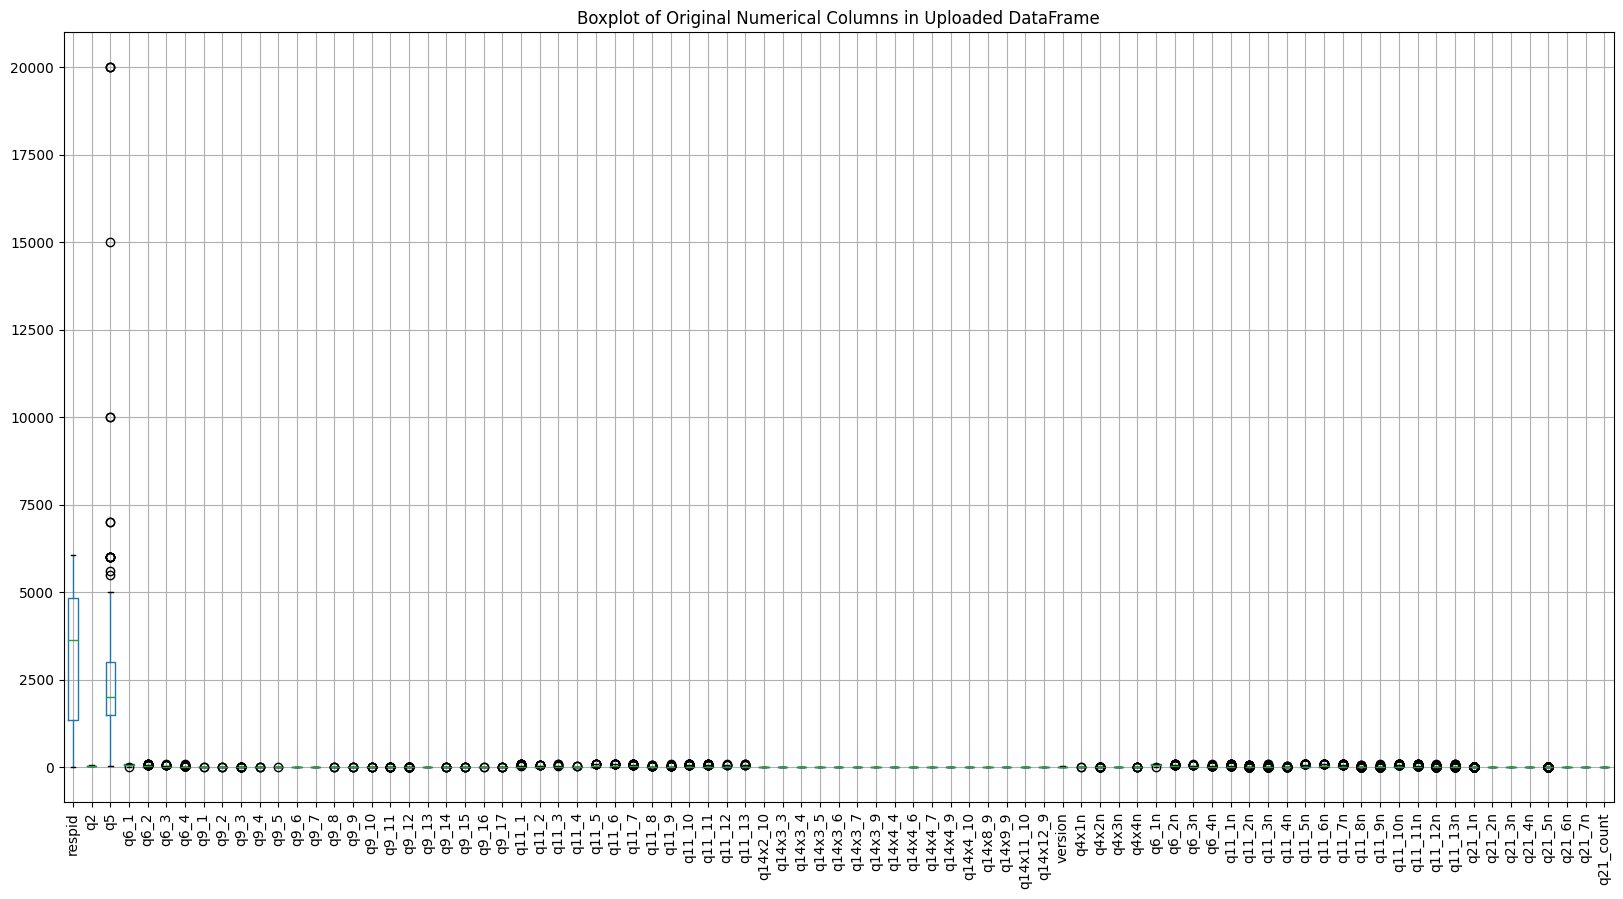

In [459]:
# Calculate the number of numerical columns without changing their names
num_numerical_columns = df3.select_dtypes(include=[np.number]).shape[1]

# Now we plot the boxplot for the numerical columns
num_cols = df3.select_dtypes(include=[np.number])

# Plotting
plt.figure(figsize=(20,10))
num_cols.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Original Numerical Columns in Uploaded DataFrame')
plt.show()


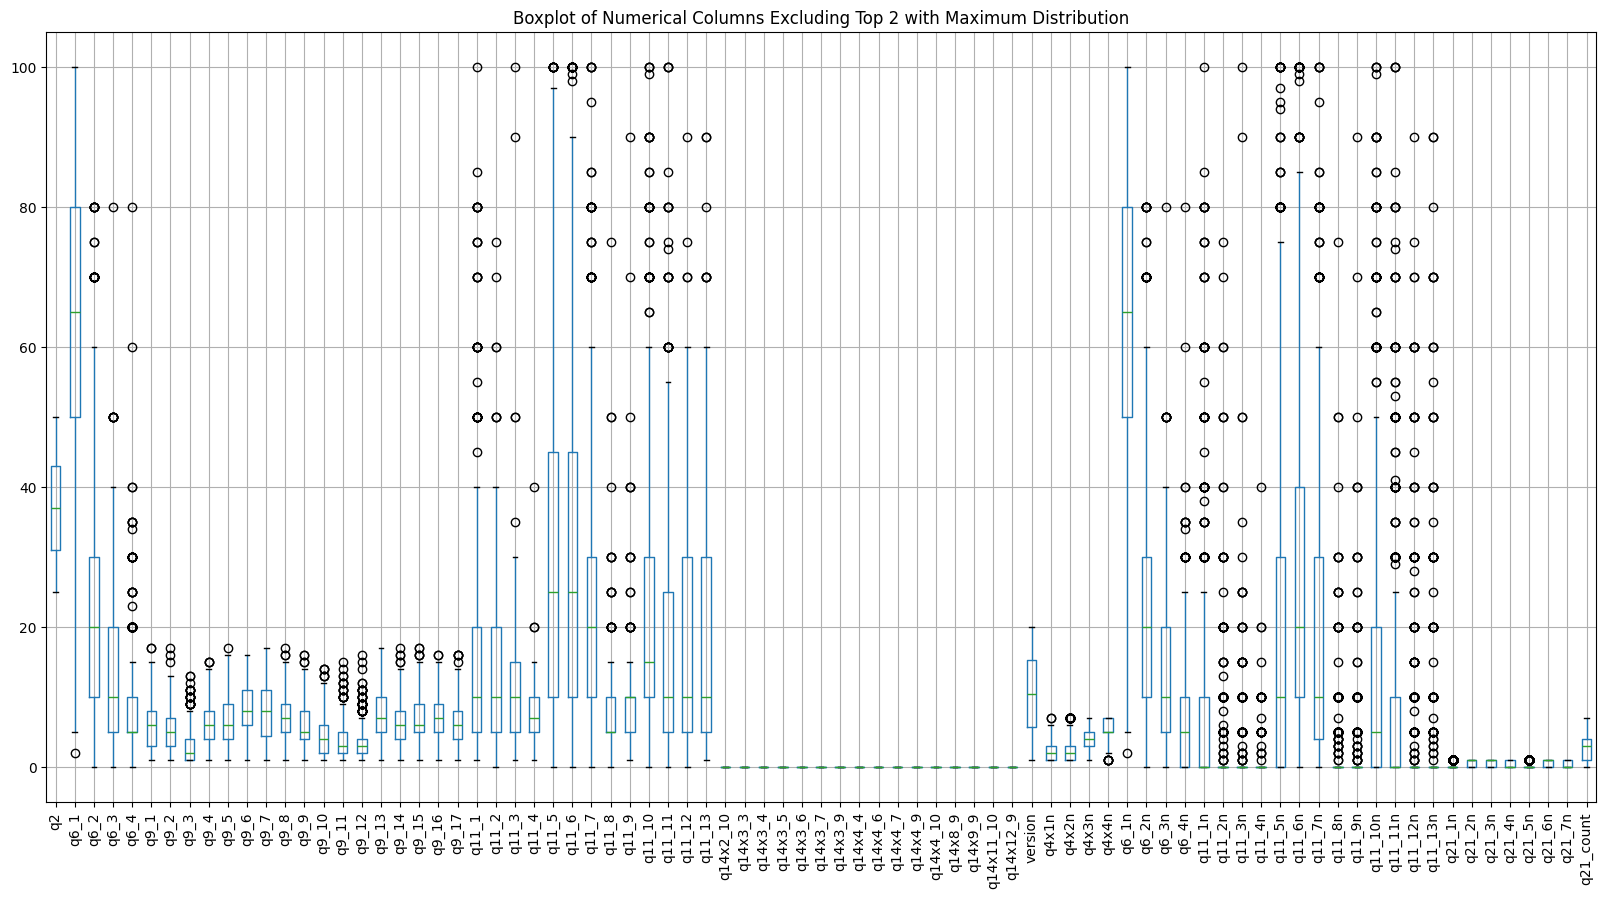

In [460]:
# lets exclude columns with maximum distribution 

# Calculate the range of each numerical column
ranges = num_cols.max() - num_cols.min()

# Sort the ranges to find the columns with the maximum distribution
sorted_ranges = ranges.sort_values(ascending=False)

# Now we exclude the top 2 columns with the maximum distribution
exclude_columns = sorted_ranges.index[:2]
num_cols_filtered = num_cols.drop(columns=exclude_columns)

# Plotting the boxplot for the numerical columns after excluding the specified ones
plt.figure(figsize=(20,10))
num_cols_filtered.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Columns Excluding Top 2 with Maximum Distribution')
plt.show()


Not all them seem to be significant. 

But which of them are categorical and which are really numerical? Which of them make sense at all. Let's choose some top of them?


Based on the questionnaire and the typical analysis goals for clustering customer segments, the following variables seem to be most significant for capturing grocery purchasing behavior and habits:

Q1: Gender - This is a categorical variable that can influence purchasing patterns.
Q2: Age - Although this is numerical, it's often binned into categories for analysis.
Q5: Average monthly expenditure on groceries - This is a numerical variable that indicates spending behavior.
Q6: Share of expenditures going to different types of stores - These are numerical variables that show preference and reliance on certain store types.
Q8: Factors important when deciding from which store to shop - These are categorical variables but will be treated numerically when encoded for analysis.
Q10: Supermarkets shopped at in the last month - This is categorical data indicating customer preferences.
Q11: Share of total food and grocery spending in each supermarket - These are numerical variables that show distribution of spending across stores.
Q28: Household’s monthly combined income - This is often a numerical variable, but it may be treated as categorical depending on how it's binned.

But for testing let's just take Q1, Q2 and Q5. 

In [474]:
# Repeating the steps with an adjustment for making Age (Q2) a categorical variable based on 5-year bins

# Resetting the selection to include only Q1, Q2, and Q5
selected_columns_final = ['q1', 'q2', 'q5']

# Creating a new DataFrame with the selected columns
df_final_categorical_age = df3[selected_columns_final]

# Converting Q1 (Gender) to numeric format: 0 for female, 1 for male
df_final_categorical_age['q1'] = df_final_categorical_age['q1'].apply(lambda x: 0 if 'female' in x.lower() else 1)

# Converting Q2 (Age) and Q5 (Average monthly expenditure) to numeric format
df_final_categorical_age[['q2', 'q5']] = df_final_categorical_age[['q2', 'q5']].apply(pd.to_numeric, errors='coerce')

# Binning Age into 5-year intervals
df_final_categorical_age['q2_binned'] = pd.cut(df_final_categorical_age['q2'], bins=range(15, 100, 5), right=False)

# Dropping rows with NaNs in 'q2' and 'q5' since they are crucial for the analysis
df_final_categorical_age.dropna(subset=['q2', 'q5'], inplace=True)

df_final_categorical_age.head()


/var/folders/3t/1cf4qhj170q46d820lvp7bzc0000gn/T/ipykernel_56189/2886711417.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_categorical_age['q1'] = df_final_categorical_age['q1'].apply(lambda x: 0 if 'female' in x.lower() else 1)
/var/folders/3t/1cf4qhj170q46d820lvp7bzc0000gn/T/ipykernel_56189/2886711417.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_categorical_age[['q2', 'q5']] = df_final_categorical_age[['q2', 'q5']].apply(pd.to_numeric, errors='coerce')
/var/folders/3t/1cf4q

,q1,q2,q5,q2_binned
0,1,33,1500,"[30, 35)"
1,1,27,3000,"[25, 30)"
2,1,32,1500,"[30, 35)"
3,1,46,1500,"[45, 50)"
4,1,47,2000,"[45, 50)"


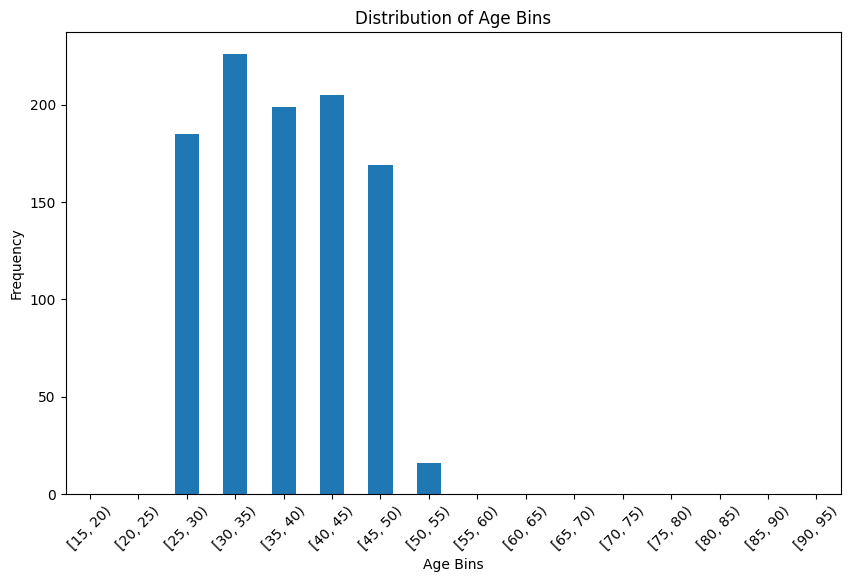

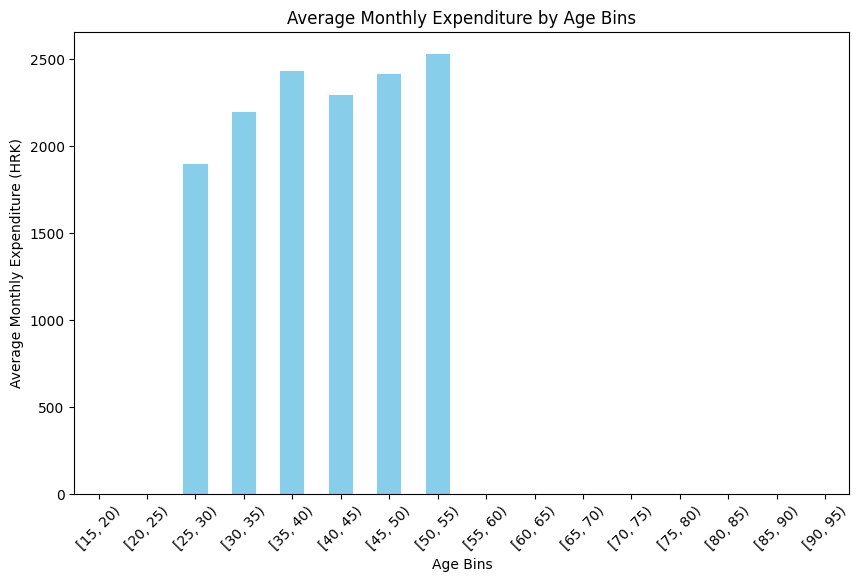

In [479]:
# Plotting the distribution of Age Bins
plt.figure(figsize=(10, 6))
df_final_categorical_age['q2_binned'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting Average Monthly Expenditure by Age Bins
plt.figure(figsize=(10, 6))
df_final_categorical_age.groupby('q2_binned')['q5'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Monthly Expenditure by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Average Monthly Expenditure (HRK)')
plt.xticks(rotation=45)
plt.show()


In [480]:
# Conducting one-hot encoding for age bins
df_encoded = pd.get_dummies(df_final_categorical_age, columns=['q2_binned'])

# Dropping the original 'q2' column as it's no longer needed
df_encoded.drop('q2', axis=1, inplace=True)

df_encoded.head()


,q1,q5,"q2_binned_[15, 20)","q2_binned_[20, 25)","q2_binned_[25, 30)","q2_binned_[30, 35)","q2_binned_[35, 40)","q2_binned_[40, 45)","q2_binned_[45, 50)","q2_binned_[50, 55)","q2_binned_[55, 60)","q2_binned_[60, 65)","q2_binned_[65, 70)","q2_binned_[70, 75)","q2_binned_[75, 80)","q2_binned_[80, 85)","q2_binned_[85, 90)","q2_binned_[90, 95)"
0,1,1500,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,1,3000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,1500,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,1,1500,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,1,2000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


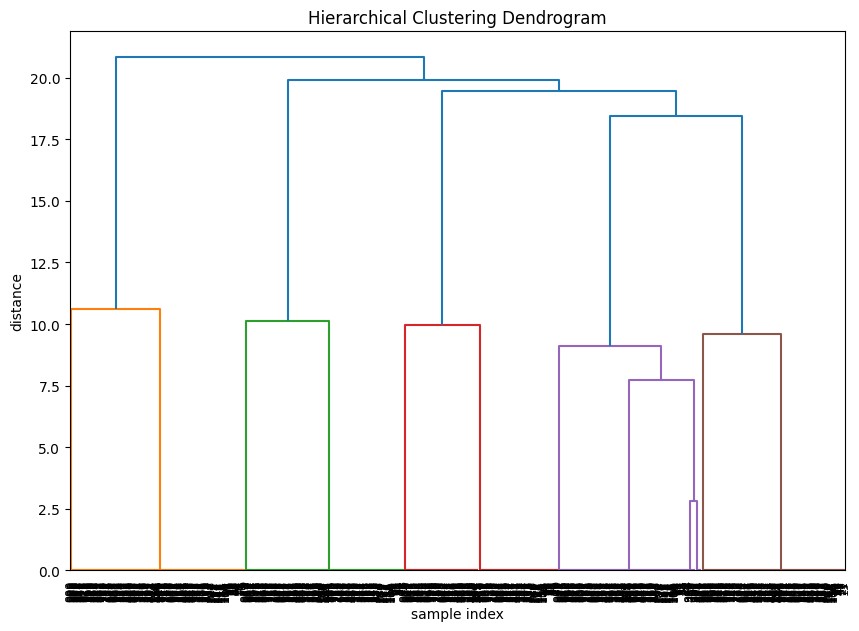

In [481]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Selecting the data for clustering (excluding the 'q5' - Average monthly expenditure for now to focus on categorical data)
X = df_encoded.drop(['q5'], axis=1)

# Generating the linkage matrix using Ward's method
Z = linkage(X, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [487]:
from scipy.cluster.hierarchy import fcluster

# Determine the number of clusters, let's say we choose 5 for this example
k = 5

# Apply the fcluster function to cut the dendrogram and assign cluster labels
cluster_labels = fcluster(Z, k, criterion='maxclust')

# Add the cluster labels to the original dataframe with expenditure
df_final_categorical_age['cluster'] = cluster_labels
df_encoded_with_exp = df_encoded.copy()
df_encoded_with_exp['cluster'] = cluster_labels

# Calculate mean age and expenditure for each cluster
cluster_characteristics = df_final_categorical_age.groupby('cluster').agg({
    'q2': 'mean',  # Mean age
    'q5': 'mean',  # Mean expenditure
    'q1': lambda x: (x==1).sum()/len(x) * 100  # Percentage of males
}).rename(columns={'q2': 'mean_age', 'q5': 'mean_expenditure', 'q1': 'percentage_males'})

cluster_characteristics.astype(int)


,mean_age,mean_expenditure,percentage_males
cluster,,,
1,32,2192,49
2,41,2292,47
3,36,2429,51
4,47,2421,47
5,27,1895,45
